# Library

In [ ]:
!pip install pandas numpy matplotlib seaborn nltk wordcloud Sastrawi emoji imbalanced-learn tqdm pyLDAvis gensim scikit-learn tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 608.4/608.4 kB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 109.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 94.4 MB/s eta 0:00:00


In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', message='.*datetime.datetime.utcnow.*')

from tqdm import tqdm
tqdm.pandas()

import numpy as np
import pandas as pd
import json
import re
import string
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import emoji
import ast

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

nltk.download('punkt')
nltk.download('punkt_tab')

import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

import gensim
from gensim import corpora
from gensim.models import LdaModel, CoherenceModel, FastText

from sklearn.decomposition import LatentDirichletAllocation

from imblearn.over_sampling import RandomOverSampler

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import warnings
from datetime import timezone
warnings.filterwarnings('ignore', category=DeprecationWarning, module='jupyter_client')

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Embedding, Dropout, Input, Attention, Concatenate
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


# EDA

In [ ]:
df = pd.read_csv('review_dana_labelled.csv')

Cek Data

In [ ]:
print("Informasi dataset:")
df.info()

Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  50000 non-null  object
 1   score     50000 non-null  int64 
 2   at        50000 non-null  object
 3   content   50000 non-null  object
 4   sentimen  50000 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
df.head()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,userName,score,at,content,sentimen
0,Elisya Kasni,5,2024-02-15 11:24:56,Bagus,POSITIVE
1,Rusman Man,2,2024-02-15 11:24:03,Dana mmg keren mantap.,POSITIVE
2,Qiliw Sadega,1,2024-02-15 11:23:34,Saya ngajuin upgrade dana premium krna ktp say...,NEGATIVE
3,Kijutjrv2 Kijut,3,2024-02-15 11:22:46,Kocak mana diskon nya ml malah eror segala kag...,NEGATIVE
4,Fifi Alfiyah,1,2024-02-15 11:21:34,Saldo hilang karena no lama Hilang ganti no sa...,NEGATIVE


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
df.tail()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,userName,score,at,content,sentimen
49995,Marha Marha,5,2023-12-31 16:34:55,Bagus,POSITIVE
49996,Unique Laudy,1,2023-12-31 16:33:47,"error, tidak bisa masuk",NEGATIVE
49997,supendi supendi,5,2023-12-31 16:30:08,Cukup membantu,POSITIVE
49998,hasansend farm,1,2023-12-31 16:28:51,"tolong pihak dana knp saldo saya hilang,ada yg...",NEUTRAL
49999,Maria Awoitau,1,2023-12-31 16:28:46,good. 👌,NEGATIVE


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Cek Null dan Duplikat

In [ ]:
df.isnull().sum()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,0
userName,0
score,0
at,0
content,0
sentimen,0


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [ ]:
df.duplicated().sum()

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

np.int64(0)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Persebaran Data

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

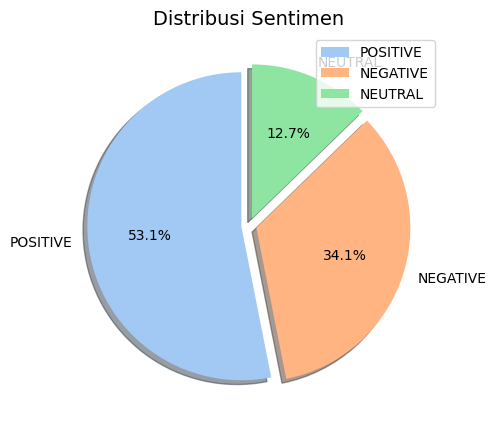

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
plt.figure(figsize=(7, 5))
colors = sns.color_palette('pastel')[0:len(df['sentimen'].unique())]
df['sentimen'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=colors,
    startangle=90,
    shadow=True,
    explode=[0.05]*len(df['sentimen'].unique())
)
plt.title('Distribusi Sentimen', fontsize=14)
plt.ylabel('')
plt.legend(labels=df['sentimen'].value_counts().index, loc='upper right')
plt.show()

In [ ]:
print("Jumlah ulasan per sentimen:")
print(df['sentimen'].value_counts())

Jumlah ulasan per sentimen:
sentimen
POSITIVE    26555
NEGATIVE    17073
NEUTRAL      6372
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

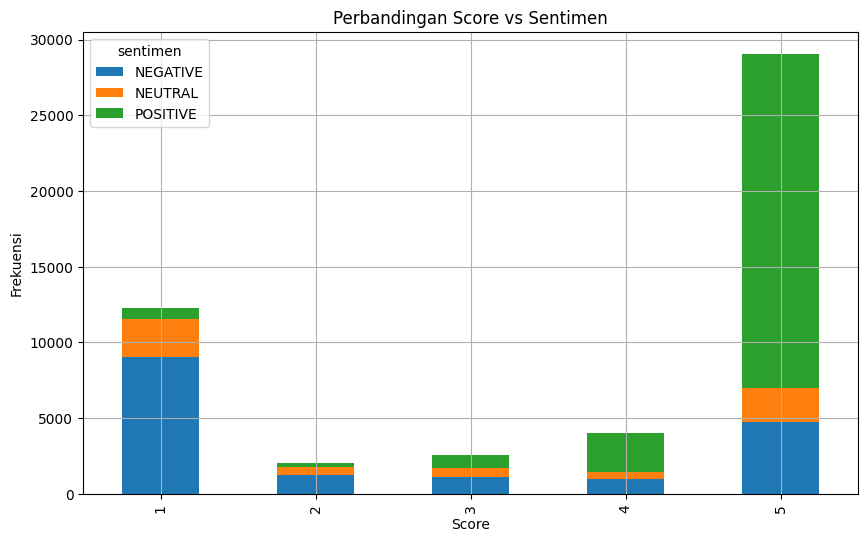

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
if 'score' in df.columns:
    pd.crosstab(df['score'], df['sentimen']).plot(kind='bar', stacked=True, figsize=(10,6))
    plt.title('Perbandingan Score vs Sentimen')
    plt.xlabel('Score')
    plt.ylabel('Frekuensi')
    plt.grid(True)
    plt.show()

In [ ]:
df['panjang_teks'] = df['content'].apply(lambda x: len(str(x).split()))

bins = [0, 50, 100, 150, 200]
labels = ['1-50', '51-100', '101-150', '151-200']

df['kategori_panjang'] = pd.cut(df['panjang_teks'], bins=bins, labels=labels, include_lowest=True)

distribusi = df['kategori_panjang'].value_counts().sort_index()

print(distribusi)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

kategori_panjang
1-50       49008
51-100       992
101-150        0
151-200        0
Name: count, dtype: int64


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

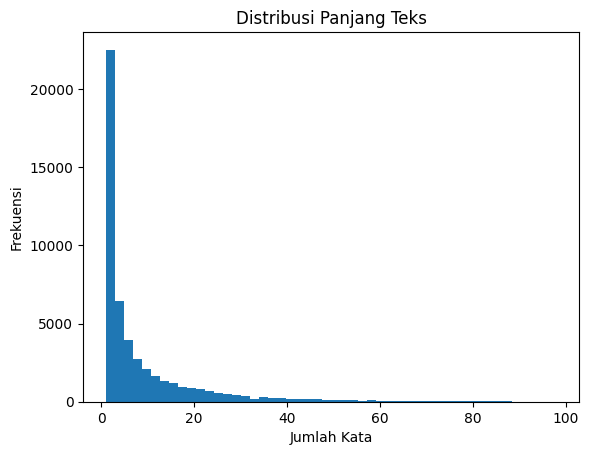

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [ ]:
plt.hist(df['panjang_teks'], bins=50)
plt.title("Distribusi Panjang Teks")
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi")
plt.show()

# Balance Data

In [ ]:
target = 6372

df['panjang_teks'] = df['content'].apply(lambda x: len(str(x).split()))

df = df.sort_values(by=['sentimen', 'panjang_teks'], ascending=[True, False])

df_balanced = (
    df.groupby('sentimen', group_keys=False)
    .head(target)
)

print("Distribusi data setelah undersampling:")
print(df_balanced['sentimen'].value_counts())

Distribusi data setelah undersampling:
sentimen
NEGATIVE    6372
NEUTRAL     6372
POSITIVE    6372
Name: count, dtype: int64


# Preprocessing

Cek Data

In [ ]:
df_balanced = df_balanced.drop(columns=['panjang_teks', 'kategori_panjang', 'rentang_kata'], errors='ignore')

In [ ]:
df_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19116 entries, 5613 to 45021
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   userName  19116 non-null  object
 1   score     19116 non-null  int64 
 2   at        19116 non-null  object
 3   content   19116 non-null  object
 4   sentimen  19116 non-null  object
dtypes: int64(1), object(4)
memory usage: 896.1+ KB


In [ ]:
stop_factory = StopWordRemoverFactory()
stop_words = set(stop_factory.get_stop_words())

negation_words = {
    'tidak', 'tak', 'tanpa', 'bukan', 'belum'
}

sentiment_words = {
    'puas', 'kecewa', 'buruk', 'jelek', 'parah',
    'bagus', 'baik', 'mantap', 'hilang',
    'gagal', 'error', 'bermasalah', 'kehilangan'
}[=]

stop_words = stop_words - negation_words - sentiment_words

def load_slang_dict(filepath='slangword.txt'):
    slang_dict = {}
    try:
        with open(filepath, 'r', encoding='utf-8') as file:
            for line in file:
                if ':' in line:
                    slang, formal = line.strip().split(':', 1)
                    slang_dict[slang.strip()] = formal.strip()
    except FileNotFoundError:
        pass
    return slang_dict

slang_dict = load_slang_dict('slangword.txt')
stemmer = StemmerFactory().create_stemmer()

def remove_emoji(text):
    return emoji.replace_emoji(text, replace='')

def normalize_slang(text):
    return ' '.join([slang_dict.get(w, w) for w in text.split()])

def clean_text(text):
    text = str(text).lower()
    text = normalize_slang(text)
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'@\w+|#\w+', '', text)
    text = re.sub(r'\d+', '', text)
    text = remove_emoji(text)
    text = re.sub('[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def preprocess_text(text):
    text = clean_text(text)
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words]
    tokens = [w for w in tokens if len(w) > 2]
    tokens = [stemmer.stem(w) for w in tokens]
    return tokens

df_balanced['clean_content'] = df_balanced['content'].progress_apply(preprocess_text)

100%|██████████| 19116/19116 [19:55<00:00, 15.98it/s] 


In [ ]:
df_balanced.head()

,userName,score,at,content,sentimen,clean_content
5613,Amidhs Syari,1,2024-02-10 12:02:33,"Kalian beruntung yang b5, dana kalian tidk hil...",NEGATIVE,"[kalian, untung, dana, kalian, tidk, hilang, a..."
13351,Citra Apriliyanti,1,2024-02-03 23:41:26,gua mau update ke premium susah bnr ni aplikas...,NEGATIVE,"[aku, mau, baru, premium, sulit, benar, aplika..."
8445,Yen Yen,1,2024-02-08 01:44:44,"Saya sangat kecewa dgn aplk Dana, sy kirim uan...",NEGATIVE,"[sangat, kecewa, aplikasi, dana, kirim, uang, ..."
12728,Mohammad Ridhuwan,2,2024-02-04 11:20:35,Bintang 2 aj dlu GK tau dah tiba tib aj kek gi...,NEGATIVE,"[bintang, dulu, tahu, dah, tiba, tiba, gin, pa..."
33476,Hendi Lim90,1,2024-01-16 09:24:21,"Awas tiati sma dana, saya sering dengar cerita...",NEGATIVE,"[awas, tiati, sama, dana, sering, dengar, ceri..."


In [ ]:
df_balanced.to_csv('preprocessed_data.csv', index=False)
print("Data preprocessed disimpan ke 'preprocessed_data.csv'")

Data preprocessed disimpan ke 'preprocessed_data.csv'


# Informasi Setelah Preprocessing

In [ ]:
def generate_wordcloud(sentiment):
    text = ' '.join(
        [' '.join(tokens) for tokens in df_balanced[df_balanced['sentimen'] == sentiment]['clean_content']]
    )

    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white'
    ).generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud untuk Sentimen {sentiment}', fontsize=14)
    plt.show()


for s in df_balanced['sentimen'].unique():
    generate_wordcloud(s)

# LDA

In [ ]:
df_balanced = pd.read_csv('preprocessed_data.csv')
df_balanced['clean_content'] = df_balanced['clean_content'].apply(ast.literal_eval)
print("Data preprocessed dimuat dari 'preprocessed_data.csv'")
df_balanced.info()
df_balanced.head()

Data preprocessed dimuat dari 'preprocessed_data.csv'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19116 entries, 0 to 19115
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       19116 non-null  object
 1   score          19116 non-null  int64 
 2   at             19116 non-null  object
 3   content        19116 non-null  object
 4   sentimen       19116 non-null  object
 5   clean_content  19116 non-null  object
dtypes: int64(1), object(5)
memory usage: 896.2+ KB


,userName,score,at,content,sentimen,clean_content
0,Amidhs Syari,1,2024-02-10 12:02:33,"Kalian beruntung yang b5, dana kalian tidk hil...",NEGATIVE,"[kalian, untung, dana, kalian, tidk, hilang, a..."
1,Citra Apriliyanti,1,2024-02-03 23:41:26,gua mau update ke premium susah bnr ni aplikas...,NEGATIVE,"[aku, mau, baru, premium, sulit, benar, aplika..."
2,Yen Yen,1,2024-02-08 01:44:44,"Saya sangat kecewa dgn aplk Dana, sy kirim uan...",NEGATIVE,"[sangat, kecewa, aplikasi, dana, kirim, uang, ..."
3,Mohammad Ridhuwan,2,2024-02-04 11:20:35,Bintang 2 aj dlu GK tau dah tiba tib aj kek gi...,NEGATIVE,"[bintang, dulu, tahu, dah, tiba, tiba, gin, pa..."
4,Hendi Lim90,1,2024-01-16 09:24:21,"Awas tiati sma dana, saya sering dengar cerita...",NEGATIVE,"[awas, tiati, sama, dana, sering, dengar, ceri..."


In [ ]:
print(df_balanced['clean_content'].iloc[0])
print(type(df_balanced['clean_content'].iloc[0]))

dictionary = corpora.Dictionary(df_balanced['clean_content'])
dictionary.filter_extremes(no_below=5, no_above=0.3)
corpus = [dictionary.doc2bow(text) for text in df_balanced['clean_content']]

print(f"Jumlah kata dalam dictionary: {len(dictionary)}")

['kalian', 'untung', 'dana', 'kalian', 'tidk', 'hilang', 'aku', 'kawan', 'hilang', 'tanpa', 'jelas', 'pin', 'nomer', 'privasi', 'tahu', 'kok', 'aja', 'bobol', 'udah', 'komplen', 'datngin', 'kantor', 'dna', 'lngusng', 'kaga', 'balikin', 'coyyy', 'sapam', 'nya', 'sok', 'asik', 'banget', 'ama', 'atas', 'lau', 'sok', 'asik', 'aku', 'tahu', 'alasam', 'msuk', 'kntor', 'karna', 'bilang', 'satpam', 'jangan', 'orng', 'penting', 'masuk', 'kantor', 'nyusain', 'gmna', 'gitu', 'hidup', 'intiny', 'kalo', 'udah', 'lapor', 'sana', 'sini', 'minmal', 'mah', 'jawab', 'yng', 'benar', 'bot']
<class 'list'>
Jumlah kata dalam dictionary: 2169


Mencari jumlah topik optimal...


100%|██████████| 8/8 [09:49<00:00, 73.63s/it]


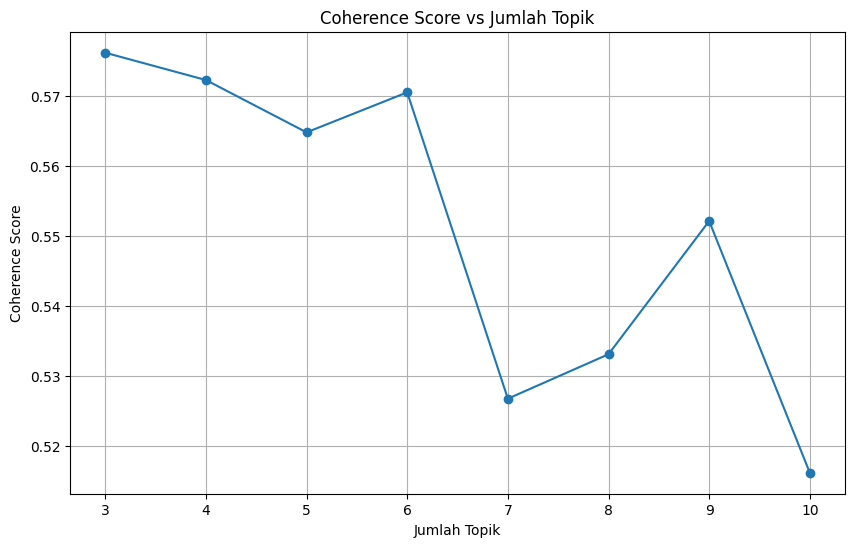

Jumlah topik optimal: 3 (Coherence: 0.5762)


In [ ]:
coherence_scores = []
num_topics_range = range(3, 11)

print("Mencari jumlah topik optimal...")

for num_topics in tqdm(num_topics_range):
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=num_topics,
        random_state=42,
        passes=20,
        iterations=400,
        chunksize=2000,
        alpha='symmetric',
        eta='auto'
    )

    coherence_model = CoherenceModel(
        model=lda_model,
        texts=df_balanced['clean_content'],
        dictionary=dictionary,
        coherence='c_v'
    )
    coherence_scores.append(coherence_model.get_coherence())

plt.figure(figsize=(10, 6))
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.xlabel('Jumlah Topik')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Jumlah Topik')
plt.grid(True)
plt.show()

optimal_topics = list(num_topics_range)[np.argmax(coherence_scores)]
print(f"Jumlah topik optimal: {optimal_topics} (Coherence: {max(coherence_scores):.4f})")

In [ ]:
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=optimal_topics,
    random_state=42,
    passes=30,
    iterations=500,
    chunksize=2000,
    alpha='symmetric',
    eta='auto',
    per_word_topics=True
)

print("\nTopik-topik yang ditemukan:")
for idx, topic in lda_model.print_topics(num_words=12):
    print(f"\nTopik {idx}:")
    print(topic)

vis = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)


Topik-topik yang ditemukan:

Topik 0:
0.045*"tidak" + 0.043*"saldo" + 0.034*"uang" + 0.027*"aplikasi" + 0.022*"hilang" + 0.015*"transaksi" + 0.015*"nya" + 0.014*"tiba" + 0.012*"aman" + 0.011*"pihak" + 0.011*"akun" + 0.010*"sama"

Topik 1:
0.026*"mau" + 0.024*"nya" + 0.022*"akun" + 0.020*"gak" + 0.020*"masuk" + 0.019*"baru" + 0.018*"aplikasi" + 0.016*"premium" + 0.016*"tidak" + 0.015*"aja" + 0.015*"udah" + 0.015*"login"

Topik 2:
0.103*"sangat" + 0.063*"bantu" + 0.057*"bagus" + 0.054*"aplikasi" + 0.050*"mudah" + 0.034*"transaksi" + 0.024*"baik" + 0.021*"cepat" + 0.018*"lebih" + 0.018*"mantap" + 0.016*"guna" + 0.016*"nya"


In [ ]:
topic_names = {
    0: "Keluhan Saldo Hilang, Transaksi Hilang, dan Keamanan Akun",
    1: "Masalah Login Akun Baru, Premium, dan Akses Aplikasi",
    2: "Pujian Aplikasi Mudah, Cepat, Bagus, dan Sangat Membantu"
}

def get_document_topics(lda_model, corpus):
    doc_topics = []
    for doc in tqdm(corpus):
        topic_dist = lda_model.get_document_topics(doc, minimum_probability=0)
        topic_dist = sorted(topic_dist, key=lambda x: x[0])
        doc_topics.append([prob for _, prob in topic_dist])
    return np.array(doc_topics)

topic_distributions = get_document_topics(lda_model, corpus)

df_balanced['dominant_topic'] = np.argmax(topic_distributions, axis=1)
df_balanced['dominant_topic_name'] = df_balanced['dominant_topic'].map(topic_names)
df_balanced['topic_distribution'] = topic_distributions.tolist()

print("\nDistribusi dokumen per topik:")
print(df_balanced['dominant_topic_name'].value_counts().sort_index())

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 2000)
print("\nSample data:")
display(df_balanced.sample(10, random_state=42))

100%|██████████| 19116/19116 [00:04<00:00, 4390.59it/s]


Distribusi dokumen per topik:
dominant_topic_name
Keluhan Saldo Hilang, Transaksi Hilang, dan Keamanan Akun    5882
Masalah Login Akun Baru, Premium, dan Akses Aplikasi         6633
Pujian Aplikasi Mudah, Cepat, Bagus, dan Sangat Membantu     6601
Name: count, dtype: int64

Sample data:


,userName,score,at,content,sentimen,clean_content,dominant_topic,dominant_topic_name,topic_distribution
14363,Souji Hermanto,5,2024-01-12 07:21:57,"Udah bagus,& tolong tambahin buat bayar tansfer asuransi alianz",POSITIVE,"[udah, bagus, tambahin, buat, bayar, tansfer, asuransi, alianz]",2,"Pujian Aplikasi Mudah, Cepat, Bagus, dan Sangat Membantu","[0.28037095069885254, 0.2215646356344223, 0.49806442856788635]"
9387,Aran Syahputra,5,2024-01-30 23:51:35,Bismillahirrahmanirrahim Semoga Naro Duit Di Aplikasi ini Aman Amin,NEUTRAL,"[bismillahirrahmanirrahim, moga, naro, duit, aplikasi, aman, amin]",2,"Pujian Aplikasi Mudah, Cepat, Bagus, dan Sangat Membantu","[0.44314295053482056, 0.04877575486898422, 0.508081316947937]"
8562,Mhmd Fkr,1,2024-01-17 20:10:35,"Akun saya di ambil alih sama org lain, dan kehilangan sejumlah uang,",NEUTRAL,"[akun, ambil, alih, sama, org, hilang, jumlah, uang]",0,"Keluhan Saldo Hilang, Transaksi Hilang, dan Keamanan Akun","[0.9235625267028809, 0.039267778396606445, 0.03716973215341568]"
9233,Raden Arsya,1,2024-01-03 06:06:26,Di hp sya ko dana ga mau kebuka knpa ya.,NEUTRAL,"[sya, dana, mau, buka, knpa]",1,"Masalah Login Akun Baru, Premium, dan Akses Aplikasi","[0.07142061740159988, 0.8619072437286377, 0.06667213886976242]"
6921,Mugiwara Johnny,1,2024-01-24 09:38:00,"TIDAK RAMAH BINTANG SATU, SELALU GAK BISA BUAT DAFTAR, ALASAN TERLALU BANYAK KODE ""OTP"" PADAHAL KARENA ADA MASALAH KEAMANAN, MASALAHNYA DARI SIA BELEGUG",NEUTRAL,"[tidak, ramah, bintang, satu, selalu, gak, buat, daftar, alas, terlalu, banyak, kode, otp, padahal, masalah, aman, masalah, sia, belegug]",1,"Masalah Login Akun Baru, Premium, dan Akses Aplikasi","[0.3506113290786743, 0.6301815509796143, 0.019207162782549858]"
2605,Muhammad Iqbal,1,2024-01-05 00:10:19,"Gmna sih dana , tau"" saldo kepotong , dan saya cek , tidak ada berlangganan sama sekali , tp malah melakukan pembayaran tanpa sepengetahuan saya Mana minta pengembalian aja lama + ribet",NEGATIVE,"[gmna, sih, dana, tau, saldo, potong, cek, tidak, langgan, sama, sekali, malah, laku, bayar, tanpa, tahu, mana, minta, kembali, aja, lama, rumit]",0,"Keluhan Saldo Hilang, Transaksi Hilang, dan Keamanan Akun","[0.6815919280052185, 0.30129045248031616, 0.01711755059659481]"
18950,dede pratama Adija,5,2024-01-09 08:25:27,Makasih respon yang cepat,POSITIVE,"[terima, kasih, respon, cepat]",2,"Pujian Aplikasi Mudah, Cepat, Bagus, dan Sangat Membantu","[0.2756232023239136, 0.06754175573587418, 0.6568350791931152]"
15975,Jainal Munawar,5,2024-01-16 12:32:35,Aplikasi yang sangat membantu transaksi digital.,POSITIVE,"[aplikasi, sangat, bantu, transaksi, digital]",2,"Pujian Aplikasi Mudah, Cepat, Bagus, dan Sangat Membantu","[0.05753721669316292, 0.05606590956449509, 0.8863968849182129]"
3589,Heri Siswanto,1,2024-02-05 00:53:32,"Saya hapus apk ini,karena keamanan buruk,bisa bisa nya,saldo saya berkurang 1 jt,padahal saya gk melakukan transaksi pembayaran,respon dari cs malah d alih alihkan ke pihak lainnya",NEGATIVE,"[hapus, aplikasi, aman, buruk, nya, saldo, kurang, padahal, laku, transaksi, bayar, respon, malah, alih, alih, pihak, lain]",0,"Keluhan Saldo Hilang, Transaksi Hilang, dan Keamanan Akun","[0.9586530923843384, 0.020680870860815048, 0.02066609263420105]"
11007,gunawan gunawan,3,2024-01-20 19:11:11,belum bisa masuk ke premium,NEUTRAL,"[belum, masuk, premium]",1,"Masalah Login Akun Baru, Premium, dan Akses Aplikasi","[0.09392862021923065, 0.8227357268333435, 0.08333569765090942]"


# FastText Embedding

In [ ]:
all_sentences = df_balanced['clean_content'].tolist()
fasttext_model = FastText(
    sentences=all_sentences,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4,
    sg=1,
    epochs=10
)

print(f"FastText model trained!")
print(f"   Vocabulary size: {len(fasttext_model.wv)}")
print(f"   Vector size: {fasttext_model.wv.vector_size}")

fasttext_model.save("fasttext_model.model")
print("FastText model saved!")

FastText model trained!
   Vocabulary size: 4582
   Vector size: 100
FastText model saved!


In [ ]:
def text_to_sequence(tokens, word_index, max_len):
    sequence = [word_index.get(token, 0) for token in tokens]
    return sequence

def create_embedding_matrix(fasttext_model, word_index, embedding_dim=100):
    vocab_size = len(word_index) + 1
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    for word, idx in word_index.items():
        try:
            embedding_vector = fasttext_model.wv[word]
            embedding_matrix[idx] = embedding_vector
        except KeyError:
            embedding_matrix[idx] = np.random.randn(embedding_dim)

    return embedding_matrix

def prepare_data(df, fasttext_model, max_len=100, task='sentiment'):
    all_words = set()
    for tokens in df['clean_content']:
        all_words.update(tokens)

    word_index = {word: idx+1 for idx, word in enumerate(sorted(all_words))}

    sequences = [text_to_sequence(tokens, word_index, max_len)
                 for tokens in df['clean_content']]

    X = pad_sequences(sequences, maxlen=max_len, padding='post')

    if task == 'sentiment':
        label_map = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}
        y = np.array([label_map[label] for label in df['sentimen']])
        num_classes = 3
    else:
        y = df['dominant_topic'].values
        num_classes = len(df['dominant_topic'].unique())

    y = to_categorical(y, num_classes=num_classes)

    embedding_matrix = create_embedding_matrix(fasttext_model, word_index)

    return X, y, word_index, embedding_matrix, num_classes

print("Data preparation functions ready!")

Data preparation functions ready!


# BiLSTM

In [ ]:
def build_bilstm_attention_model(vocab_size, embedding_dim, embedding_matrix, max_len, num_classes):
    input_layer = Input(shape=(max_len,))

    embedding = Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        weights=[embedding_matrix],
        input_length=max_len,
        trainable=True
    )(input_layer)

    bilstm = Bidirectional(LSTM(128, return_sequences=True))(embedding)
    bilstm = Dropout(0.3)(bilstm)

    attention = Attention()([bilstm, bilstm])

    bilstm2 = Bidirectional(LSTM(64, return_sequences=False))(attention)
    bilstm2 = Dropout(0.3)(bilstm2)

    dense = Dense(64, activation='relu')(bilstm2)
    dense = Dropout(0.3)(dense)

    output = Dense(num_classes, activation='softmax')(dense)

    model = Model(inputs=input_layer, outputs=output)
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

print("Model architecture ready!")

Model architecture ready!


In [ ]:
print("="*60)
print("TRAINING MODEL ANALISIS SENTIMEN UNTUK SEMUA DATA")
print("="*60)

max_sequence_length = 100

X_sent, y_sent, word_index_sent, embedding_matrix_sent, num_classes_sent = prepare_data(
    df_balanced, fasttext_model, max_len=max_sequence_length, task='sentiment'
)

X_train_sent, X_test_sent, y_train_sent, y_test_sent = train_test_split(
    X_sent, y_sent, test_size=0.2, random_state=42, stratify=np.argmax(y_sent, axis=1)
)

print(f"Training size: {len(X_train_sent)}, Test size: {len(X_test_sent)}")

vocab_size_sent = len(word_index_sent) + 1
embedding_dim_sent = fasttext_model.wv.vector_size

sentiment_model = build_bilstm_attention_model(
    vocab_size=vocab_size_sent,
    embedding_dim=embedding_dim_sent,
    embedding_matrix=embedding_matrix_sent,
    max_len=max_sequence_length,
    num_classes=num_classes_sent
)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)

history_sentiment = sentiment_model.fit(
    X_train_sent, y_train_sent,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

y_pred_sent = sentiment_model.predict(X_test_sent)
y_pred_sent_classes = np.argmax(y_pred_sent, axis=1)
y_test_sent_classes = np.argmax(y_test_sent, axis=1)

accuracy_sent = accuracy_score(y_test_sent_classes, y_pred_sent_classes)
print(f"\nTest Accuracy (Sentiment): {accuracy_sent:.4f}")

label_names = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
print("\nClassification Report (Sentiment):")
print(classification_report(y_test_sent_classes, y_pred_sent_classes, target_names=label_names))

sentiment_model.save("model_sentiment_overall.h5")
print("Sentiment model saved!")

TRAINING MODEL ANALISIS SENTIMEN UNTUK SEMUA DATA
Training size: 15292, Test size: 3824
Epoch 1/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 18s 26ms/step - accuracy: 0.7431 - loss: 0.6022 - val_accuracy: 0.8699 - val_loss: 0.3590 - learning_rate: 0.0010
Epoch 2/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8720 - loss: 0.3586 - val_accuracy: 0.8715 - val_loss: 0.3509 - learning_rate: 0.0010
Epoch 3/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.8985 - loss: 0.3005 - val_accuracy: 0.8738 - val_loss: 0.3432 - learning_rate: 0.0010
Epoch 4/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9152 - loss: 0.2460 - val_accuracy: 0.8725 - val_loss: 0.3728 - learning_rate: 0.0010
Epoch 5/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9284 - loss: 0.2101 - val_accuracy: 0.8692 - val_loss: 0.3929 - learning_rate: 0.0010
Epoch 6/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9451 - loss: 0.1623 - val_accuracy: 0.8627 - val_loss: 0.4053 - learning_rate:


Test Accuracy (Sentiment): 0.8758

Classification Report (Sentiment):
              precision    recall  f1-score   support

    NEGATIVE       0.88      0.88      0.88      1274
     NEUTRAL       0.82      0.86      0.84      1275
    POSITIVE       0.93      0.89      0.91      1275

    accuracy                           0.88      3824
   macro avg       0.88      0.88      0.88      3824
weighted avg       0.88      0.88      0.88      3824

Sentiment model saved!


In [ ]:
print("="*60)
print("TRAINING MODEL KLASIFIKASI TOPIK")
print("="*60)

X_topic, y_topic, word_index_topic, embedding_matrix_topic, num_classes_topic = prepare_data(
    df_balanced, fasttext_model, max_len=max_sequence_length, task='topic'
)

X_train_topic, X_test_topic, y_train_topic, y_test_topic = train_test_split(
    X_topic, y_topic, test_size=0.2, random_state=42, stratify=np.argmax(y_topic, axis=1)
)

print(f"Training size: {len(X_train_topic)}, Test size: {len(X_test_topic)}")

vocab_size_topic = len(word_index_topic) + 1
embedding_dim_topic = fasttext_model.wv.vector_size

topic_model = build_bilstm_attention_model(
    vocab_size=vocab_size_topic,
    embedding_dim=embedding_dim_topic,
    embedding_matrix=embedding_matrix_topic,
    max_len=max_sequence_length,
    num_classes=num_classes_topic
)

early_stopping_topic = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr_topic = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    min_lr=0.00001
)

history_topic = topic_model.fit(
    X_train_topic, y_train_topic,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping_topic, reduce_lr_topic],
    verbose=1
)

y_pred_topic = topic_model.predict(X_test_topic)
y_pred_topic_classes = np.argmax(y_pred_topic, axis=1)
y_test_topic_classes = np.argmax(y_test_topic, axis=1)

accuracy_topic = accuracy_score(y_test_topic_classes, y_pred_topic_classes)
print(f"\nTest Accuracy (Topic): {accuracy_topic:.4f}")

topic_label_names = [topic_names[i] for i in range(num_classes_topic)]
print("\nClassification Report (Topic):")
print(classification_report(y_test_topic_classes, y_pred_topic_classes, target_names=topic_label_names))
topic_model.save("model_topic_classification.h5")
print("Topic classification model saved!")

TRAINING MODEL KLASIFIKASI TOPIK
Training size: 15292, Test size: 3824
Epoch 1/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.8176 - loss: 0.4724 - val_accuracy: 0.9349 - val_loss: 0.1649 - learning_rate: 0.0010
Epoch 2/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9451 - loss: 0.1445 - val_accuracy: 0.9444 - val_loss: 0.1485 - learning_rate: 0.0010
Epoch 3/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9657 - loss: 0.0855 - val_accuracy: 0.9278 - val_loss: 0.2025 - learning_rate: 0.0010
Epoch 4/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.9765 - loss: 0.0594 - val_accuracy: 0.9379 - val_loss: 0.1924 - learning_rate: 0.0010
Epoch 5/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9883 - loss: 0.0364 - val_accuracy: 0.9248 - val_loss: 0.2242 - learning_rate: 0.0010
Epoch 6/50
383/383 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9909 - loss: 0.0268 - val_accuracy: 0.9503 - val_loss: 0.1802 - learning_rate: 5.0000e-04
Epoch


Test Accuracy (Topic): 0.9440

Classification Report (Topic):
                                                           precision    recall  f1-score   support

Keluhan Saldo Hilang, Transaksi Hilang, dan Keamanan Akun       0.94      0.93      0.93      1177
     Masalah Login Akun Baru, Premium, dan Akses Aplikasi       0.95      0.93      0.94      1327
 Pujian Aplikasi Mudah, Cepat, Bagus, dan Sangat Membantu       0.94      0.98      0.96      1320

                                                 accuracy                           0.94      3824
                                                macro avg       0.94      0.94      0.94      3824
                                             weighted avg       0.94      0.94      0.94      3824

Topic classification model saved!


In [ ]:
import json

X_sent_temp, y_sent_temp, word_index_sent, embedding_matrix_sent_temp, num_classes_sent_temp = prepare_data(
    df_balanced, fasttext_model, max_len=100, task='sentiment'
)

X_topic_temp, y_topic_temp, word_index_topic, embedding_matrix_topic_temp, num_classes_topic_temp = prepare_data(
    df_balanced, fasttext_model, max_len=100, task='topic'
)

with open('word_index_sentiment.json', 'w', encoding='utf-8') as f:
    json.dump(word_index_sent, f, ensure_ascii=False, indent=2)

with open('word_index_topic.json', 'w', encoding='utf-8') as f:
    json.dump(word_index_topic, f, ensure_ascii=False, indent=2)

print("word_index_sentiment.json dan word_index_topic.json berhasil disimpan!")

✅ word_index_sentiment.json dan word_index_topic.json berhasil disimpan!


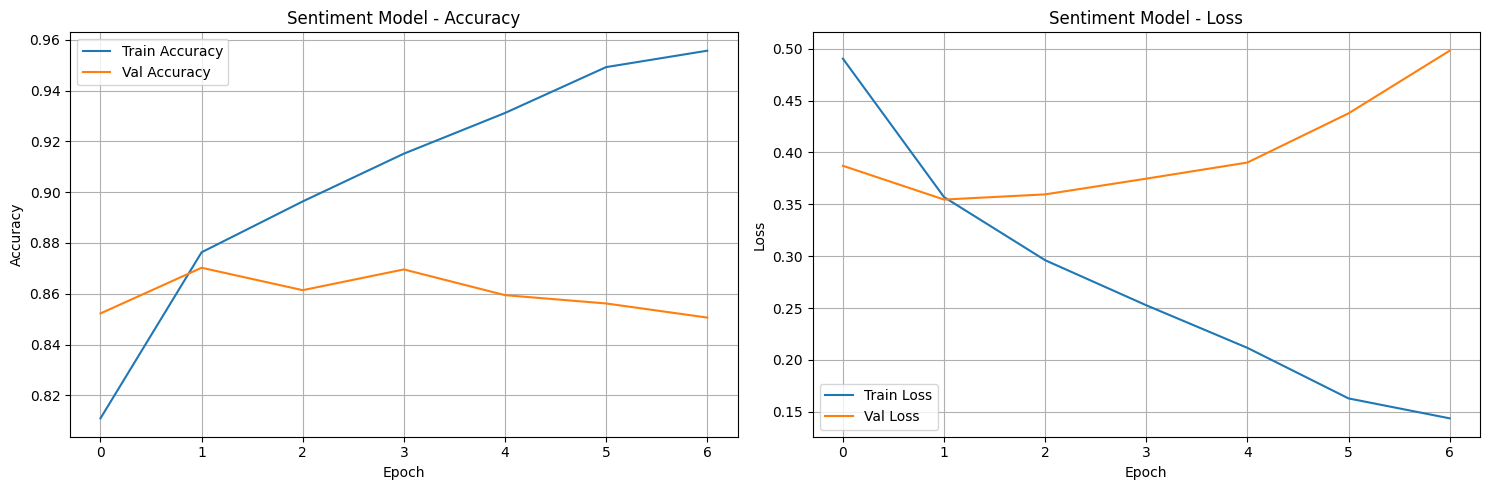

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history_sentiment.history['accuracy'], label='Train Accuracy')
axes[0].plot(history_sentiment.history['val_accuracy'], label='Val Accuracy')
axes[0].set_title('Sentiment Model - Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history_sentiment.history['loss'], label='Train Loss')
axes[1].plot(history_sentiment.history['val_loss'], label='Val Loss')
axes[1].set_title('Sentiment Model - Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('training_history_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

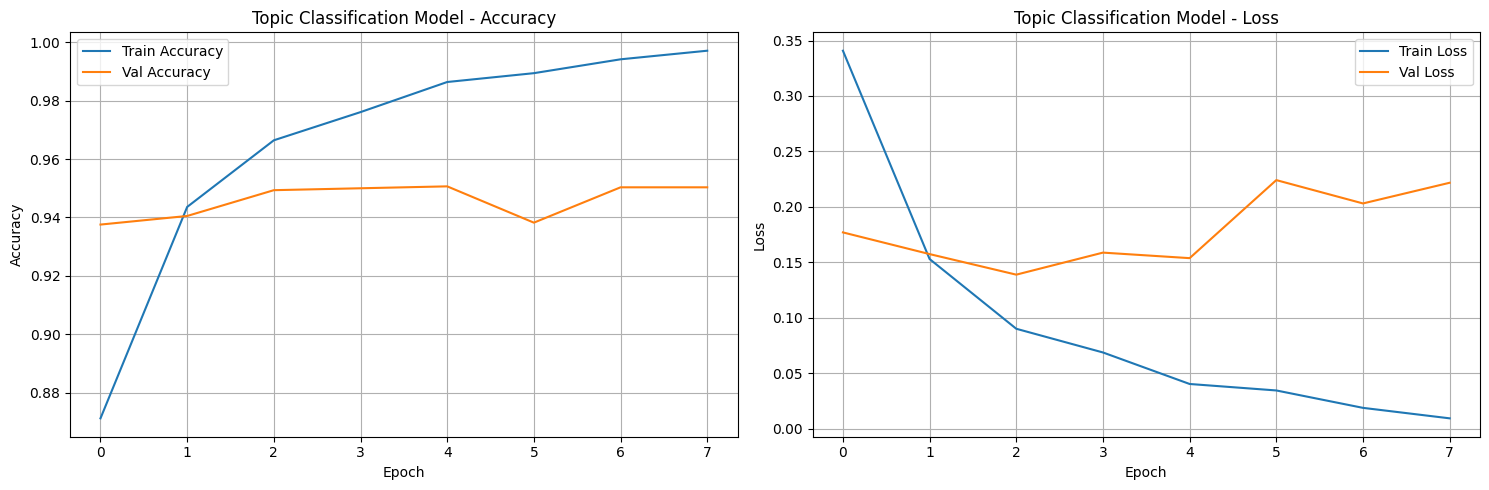

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(history_topic.history['accuracy'], label='Train Accuracy')
axes[0].plot(history_topic.history['val_accuracy'], label='Val Accuracy')
axes[0].set_title('Topic Classification Model - Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(history_topic.history['loss'], label='Train Loss')
axes[1].plot(history_topic.history['val_loss'], label='Val Loss')
axes[1].set_title('Topic Classification Model - Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.savefig('training_history_topic.png', dpi=300, bbox_inches='tight')
plt.show()

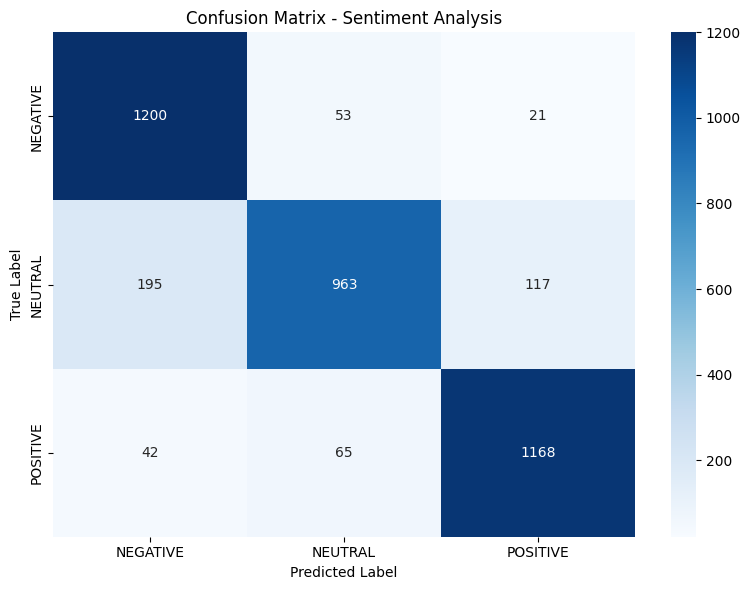

In [ ]:
cm_sent = confusion_matrix(y_test_sent_classes, y_pred_sent_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_sent,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE'],
    yticklabels=['NEGATIVE', 'NEUTRAL', 'POSITIVE']
)
plt.title('Confusion Matrix - Sentiment Analysis')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.savefig('confusion_matrix_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

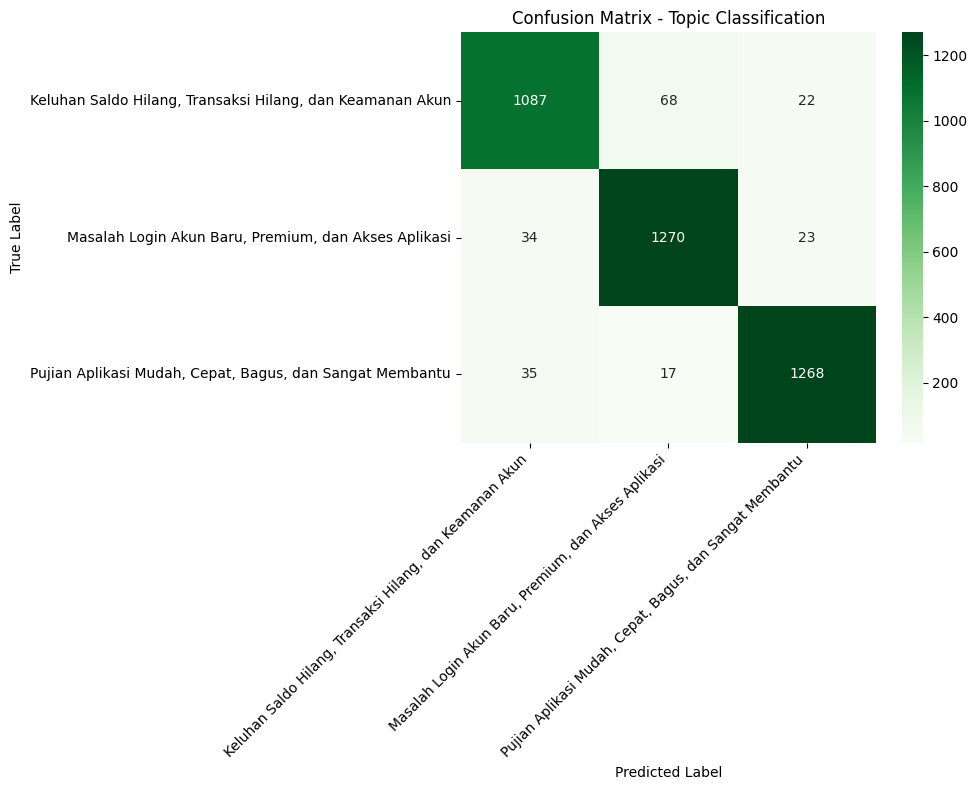

In [ ]:
cm_topic = confusion_matrix(y_test_topic_classes, y_pred_topic_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm_topic,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=topic_label_names,
    yticklabels=topic_label_names
)
plt.title('Confusion Matrix - Topic Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix_topic.png', dpi=300, bbox_inches='tight')
plt.show()

# Prediksi Teks Baru

In [ ]:
def predict_sentiment(text, model, word_index, max_len=100):
    tokens = preprocess_text(text)
    sequence = [word_index.get(token, 0) for token in tokens]
    sequence = pad_sequences([sequence], maxlen=max_len, padding='post')
    prediction = model.predict(sequence, verbose=0)
    sentiment_idx = np.argmax(prediction)
    sentiment_labels = ['NEGATIVE', 'NEUTRAL', 'POSITIVE']
    return sentiment_labels[sentiment_idx], float(prediction[0][sentiment_idx])


def predict_topic_bilstm(text, model, word_index, topic_names, max_len=100):
    tokens = preprocess_text(text)
    sequence = [word_index.get(token, 0) for token in tokens]
    sequence = pad_sequences([sequence], maxlen=max_len, padding='post')
    prediction = model.predict(sequence, verbose=0)
    topic_idx = np.argmax(prediction)
    return topic_names[topic_idx], float(prediction[0][topic_idx])


def predict_topic_lda(text, lda_model, dictionary):
    tokens = preprocess_text(text)
    bow = dictionary.doc2bow(tokens)
    topic_probs = lda_model.get_document_topics(bow)
    if not topic_probs:
        return None, None
    topic_id, prob = max(topic_probs, key=lambda x: x[1])
    return topic_id, prob


def analyze_text(text, sentiment_model, topic_model_bilstm, lda_model,
                 word_index_sent, word_index_topic, dictionary, topic_names):
    sentiment, sentiment_conf = predict_sentiment(text, sentiment_model, word_index_sent)
    topic_bilstm, topic_bilstm_conf = predict_topic_bilstm(text, topic_model_bilstm, word_index_topic, topic_names)
    topic_id_lda, topic_lda_conf = predict_topic_lda(text, lda_model, dictionary)
    topic_lda = topic_names[topic_id_lda] if topic_id_lda is not None else "UNKNOWN"

    return {
        'sentiment': sentiment,
        'sentiment_confidence': sentiment_conf,
        'topic_bilstm': topic_bilstm,
        'topic_bilstm_confidence': topic_bilstm_conf,
        'topic_lda': topic_lda,
        'topic_lda_confidence': topic_lda_conf if topic_lda_conf else 0.0
    }

print("Prediction functions ready!")

Prediction functions ready!


In [ ]:
test_texts = [
    "Aplikasi sangat membantu, transaksi cepat dan mudah digunakan",
    "Saldo saya tiba-tiba hilang tanpa pemberitahuan, sangat mengecewakan",
    "Tidak bisa login ke akun, sudah coba berkali-kali tetap gagal"
]

print("="*60)
print("HASIL PREDIKSI UNTUK TEKS CONTOH")
print("="*60)

for i, text in enumerate(test_texts, 1):
    result = analyze_text(
        text,
        sentiment_model,
        topic_model,
        lda_model,
        word_index_sent,
        word_index_topic,
        dictionary,
        topic_names
    )

    print(f"\n{i}. Teks: {text}")
    print(f"   Sentimen: {result['sentiment']} (confidence: {result['sentiment_confidence']:.4f})")
    print(f"   Topik (BiLSTM): {result['topic_bilstm']} (confidence: {result['topic_bilstm_confidence']:.4f})")
    print(f"   Topik (LDA): {result['topic_lda']} (confidence: {result['topic_lda_confidence']:.4f})")

HASIL PREDIKSI UNTUK TEKS CONTOH

1. Teks: Aplikasi sangat membantu, transaksi cepat dan mudah digunakan
   Sentimen: POSITIVE (confidence: 0.9980)
   Topik (BiLSTM): Pujian Aplikasi Mudah, Cepat, Bagus, dan Sangat Membantu (confidence: 0.9999)
   Topik (LDA): Pujian Aplikasi Mudah, Cepat, Bagus, dan Sangat Membantu (confidence: 0.9152)

2. Teks: Saldo saya tiba-tiba hilang tanpa pemberitahuan, sangat mengecewakan
   Sentimen: NEUTRAL (confidence: 0.4699)
   Topik (BiLSTM): Keluhan Saldo Hilang, Transaksi Hilang, dan Keamanan Akun (confidence: 0.9999)
   Topik (LDA): Keluhan Saldo Hilang, Transaksi Hilang, dan Keamanan Akun (confidence: 0.8079)

3. Teks: Tidak bisa login ke akun, sudah coba berkali-kali tetap gagal
   Sentimen: NEUTRAL (confidence: 0.9254)
   Topik (BiLSTM): Masalah Login Akun Baru, Premium, dan Akses Aplikasi (confidence: 0.9999)
   Topik (LDA): Masalah Login Akun Baru, Premium, dan Akses Aplikasi (confidence: 0.9218)
